In [2]:
# Boston housing price
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection as modsel

plt.style.use('ggplot')
### load data
boston = datasets.load_boston()
# boston object attributes
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [3]:
boston.data.shape
boston.target.shape

(506,)

In [4]:
### Train model and predict
# create linear regression object
linreg = linear_model.LinearRegression()
# split train and test data
x_train, x_test, y_train, y_test = modsel.train_test_split(boston.data, boston.target, test_size=0.1, random_state=42)
# fit via train data
linreg.fit(x_train, y_train)
# calculate the mse between train data and predict data
mse_value = metrics.mean_squared_error(y_train, linreg.predict(x_train))
print('mean squared error =', mse_value)
# R squared value
linreg.score(x_train, y_train)

mean squared error = 22.7375901544866


0.7375152736886281

In [5]:
### Testing the model
y_pred = linreg.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

14.995852876582495

Text(0, 0.5, 'target value')

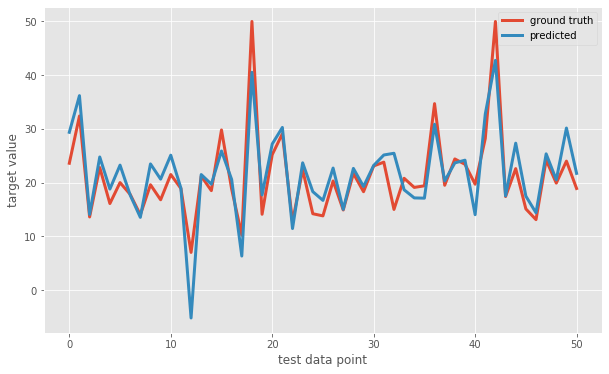

In [6]:
# visualize y test/predicted data
plt.figure(figsize=(10,6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data point')
plt.ylabel('target value')

Text(-5, 45, 'MSE = 14.996')

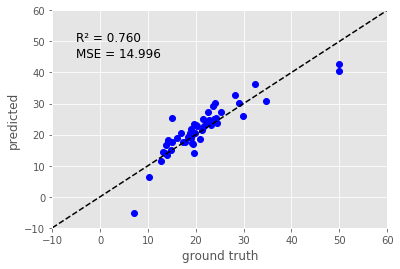

In [7]:
# The relationship between y_test and y_pred
plt.plot(y_test, y_pred, 'bo')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10,60,-10,60])
plt.xlabel('ground truth')
plt.ylabel('predicted')
# add R-squared and mse
scorestr = u'R\u00b2 = %.3f' % linreg.score(x_test, y_test)
msestr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5,50,scorestr,fontsize=12)
plt.text(-5,45,msestr,fontsize=12)

In [12]:
# L1 norm
lasso = linear_model.Lasso()
lasso.fit(x_train, y_train)
mse_lasso = metrics.mean_squared_error(y_train, lasso.predict(x_train));
print('mse for lasso =', mse_lasso)
print(u'R\u00b2 = %.3f' % lasso.score(x_train, y_train))

mse for lasso = 27.60650506200869
R² = 0.681


In [13]:
# L2 norm
ridge = linear_model.Ridge()
ridge.fit(x_train, y_train)
mse_ridge = metrics.mean_squared_error(y_train, ridge.predict(x_train))
print('mse for ridge =', mse_ridge)
print(u'R\u00b2 = %.3f' % ridge.score(x_train, y_train))

mse for ridge = 22.92375435052095
R² = 0.735


Text(0, 0.5, 'target value')

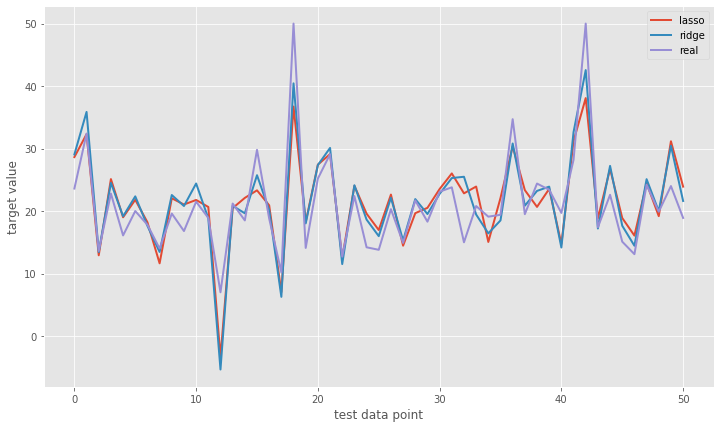

In [23]:
# compare L1, L2 by plot
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)
plt.figure(figsize=(12,7))
plt.plot(y_pred_lasso, linewidth=2, label='lasso')
plt.plot(y_pred_ridge, linewidth=2, label='ridge')
plt.plot(y_test, linewidth=2, label='real')
plt.legend(loc='best')
plt.xlabel('test data point')
plt.ylabel('target value')